In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

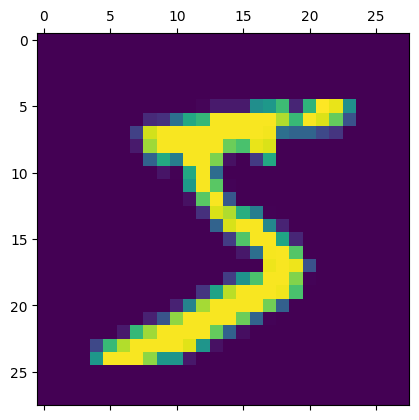

In [8]:
plt.matshow(X_train[0])

In [16]:
X_train=X_train/255
X_test=X_test/255

In [17]:
X_trainf=X_train.reshape(len(X_train),28*28)
X_testf=X_test.reshape(len(X_test),28*28)


In [18]:
X_trainf[0].shape

(784,)

In [19]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_trainf,Y_train,epochs=5)

Epoch 1/5


c:\Users\abdul\anaconda3\envs\movie_recomendation\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 657us/step - accuracy: 0.8185 - loss: 0.7085
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.9131 - loss: 0.3124
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 604us/step - accuracy: 0.9226 - loss: 0.2816
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - accuracy: 0.9238 - loss: 0.2704
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.9291 - loss: 0.2581


In [20]:
model.evaluate(X_testf,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.9151 - loss: 0.2990


[0.26585790514945984, 0.9265999794006348]

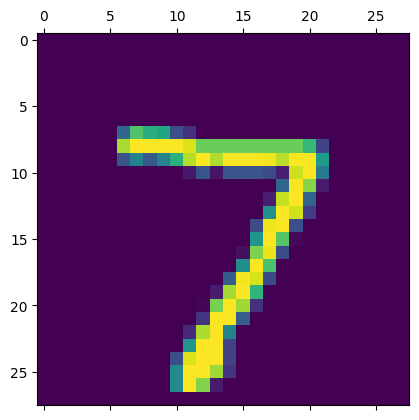

In [21]:
plt.matshow(X_test[0])

In [27]:
X_testf[0].shape

(784,)

In [31]:
single_input = np.expand_dims(X_testf[0], axis=0)

# Alternatively, use reshape to ensure it's (1, 784)
# single_input = X_testf[0].reshape(1, 784)

# Predict using the reshaped input
ans = model.predict(single_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [33]:
np.argmax(ans)

7

In [36]:
y_predicted=model.predict(X_testf)
y_predictedl=[np.argmax(i) for i in y_predicted]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step


In [37]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predictedl)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    2,    0,    6,    4,    1,    2,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   6,    9,  923,   14,    9,    6,   11,   11,   40,    3],
       [   4,    0,   18,  905,    0,   39,    2,   11,   24,    7],
       [   2,    1,    4,    1,  920,    0,    9,    4,   10,   31],
       [   9,    2,    4,   18,   10,  801,   10,    4,   28,    6],
       [  14,    3,    5,    1,    7,   19,  905,    2,    2,    0],
       [   1,    5,   21,    5,    7,    1,    0,  947,    4,   37],
       [   8,    9,    5,   16,    9,   33,    8,   10,  870,    6],
       [  11,    7,    1,    9,   27,   10,    0,   19,    6,  919]])>

Text(95.72222222222221, 0.5, 'Truth')

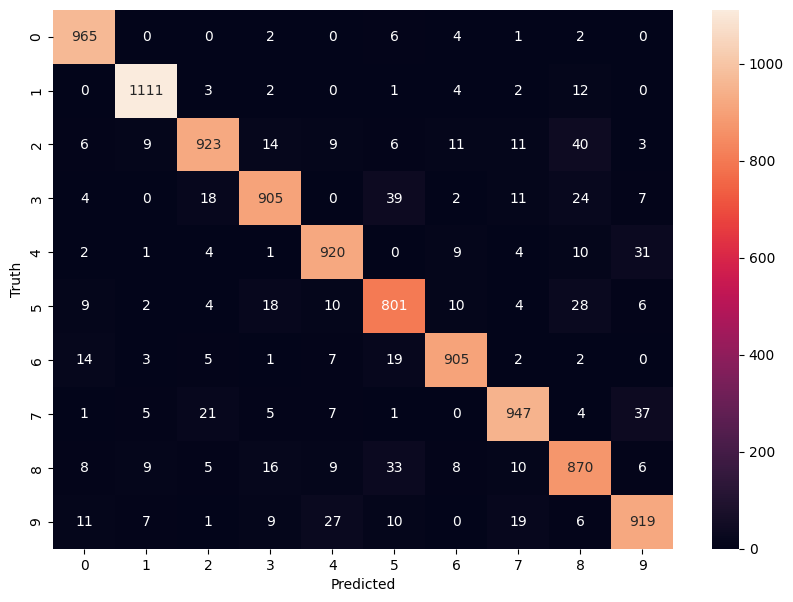

In [40]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("Truth")

In [41]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
     keras.layers.Dense(10,activation='sigmoid')

])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_trainf,Y_train,epochs=5)

Epoch 1/5


c:\Users\abdul\anaconda3\envs\movie_recomendation\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.8707 - loss: 0.4505
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 950us/step - accuracy: 0.9608 - loss: 0.1332
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9738 - loss: 0.0892
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 983us/step - accuracy: 0.9801 - loss: 0.0671
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9851 - loss: 0.0501


In [42]:
y_predicted=model.predict(X_testf)
y_predictedl=[np.argmax(i) for i in y_predicted]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step


In [43]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predictedl)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    1,    4,    1,    4,    2,    1,    1,    2,    2],
       [   0, 1117,    6,    1,    0,    0,    3,    1,    7,    0],
       [   1,    0, 1014,    0,    1,    0,    0,    4,   10,    2],
       [   0,    0,    9,  976,    0,   10,    0,    6,    3,    6],
       [   0,    0,    7,    0,  967,    0,    1,    0,    1,    6],
       [   2,    0,    0,    8,    2,  868,    4,    0,    5,    3],
       [   4,    1,    3,    0,    8,    3,  936,    0,    3,    0],
       [   0,    3,   14,    3,    2,    0,    0,  992,    1,   13],
       [   3,    0,    8,    6,    7,    2,    1,    1,  940,    6],
       [   0,    2,    0,    6,    7,    1,    0,    3,    1,  989]])>

Text(95.72222222222221, 0.5, 'Truth')

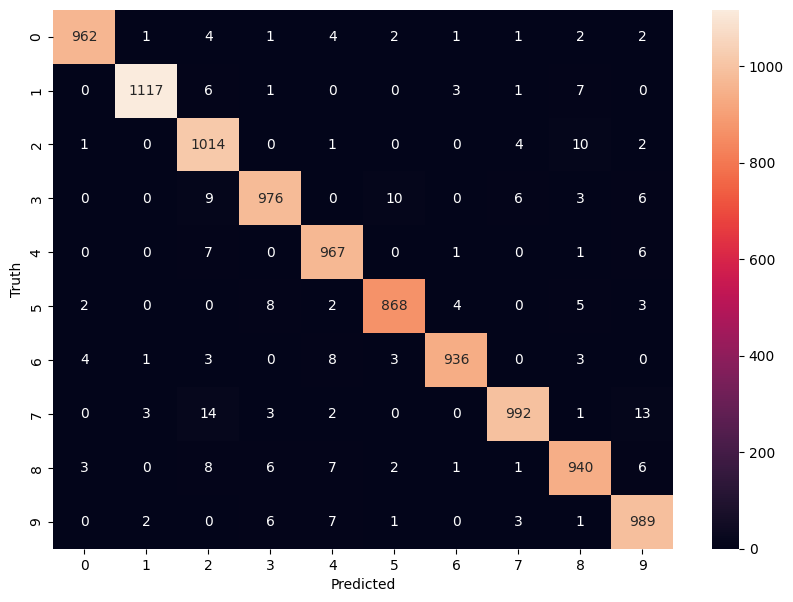

In [44]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("Truth")